In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


In [2]:
df = pd.read_csv('weather-stations.csv')

df.head()


,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


In [3]:
df = df.dropna(axis = 1 , how = 'all')
num_df = df.select_dtypes(include = ['float64' , 'int64'])
num_df = num_df.loc[:,num_df.isnull().mean() < 0.5]
num_df = num_df.fillna(num_df.mean())
X = num_df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
db = DBSCAN(eps = 0.7 , min_samples = 5)
df['cluster'] = db.fit_predict(X_scaled)
outliers = df[df['cluster'] == -1]



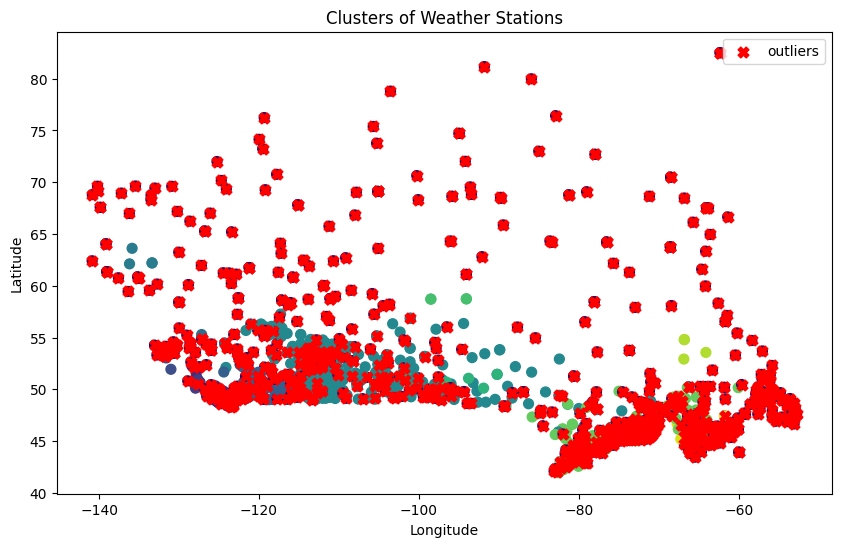

In [4]:
plt.figure(figsize = (10,6))
plt.scatter(df['Long'] , df['Lat'] , c=df['cluster'] , cmap = 'viridis' , s=50)
plt.scatter(outliers['Long'] , outliers['Lat'] , color = 'red' , marker='X' ,s=60 , label='outliers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Weather Stations')
plt.legend()
plt.show()
